# Regression PLots

[Resource](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.formula.api import ols

plt.rc('figure', figsize=(16, 8))
plt.rc('font', size=14)

# Duncan's Prestige Dataset

## Load the Data

We can use a utility function to load any R dataset available from the Rdatasets package.

In [32]:
prestige = sm.datasets.get_rdataset('Duncan', 'carData', cache=True).data
prestige.head()

,type,income,education,prestige
rownames,,,,
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [33]:
prestige_model = ols('prestige ~ income + education', data=prestige).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           8.65e-17
Time:                        08:46:17   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

## Influence plots

Influence plots show the (externally) studentized residuals vs.the leverage of each observation as measured by the hat matrix.

See [this resource](https://online.stat.psu.edu/stat462/node/247/) for more on studentized residuals.

Externally studentized residuals are residuals that are scaled by their standard deviation. The influence of each point can be visualized by the criterion keyword argument. Options are Cook's distance and DFFITS, two measures of influence.

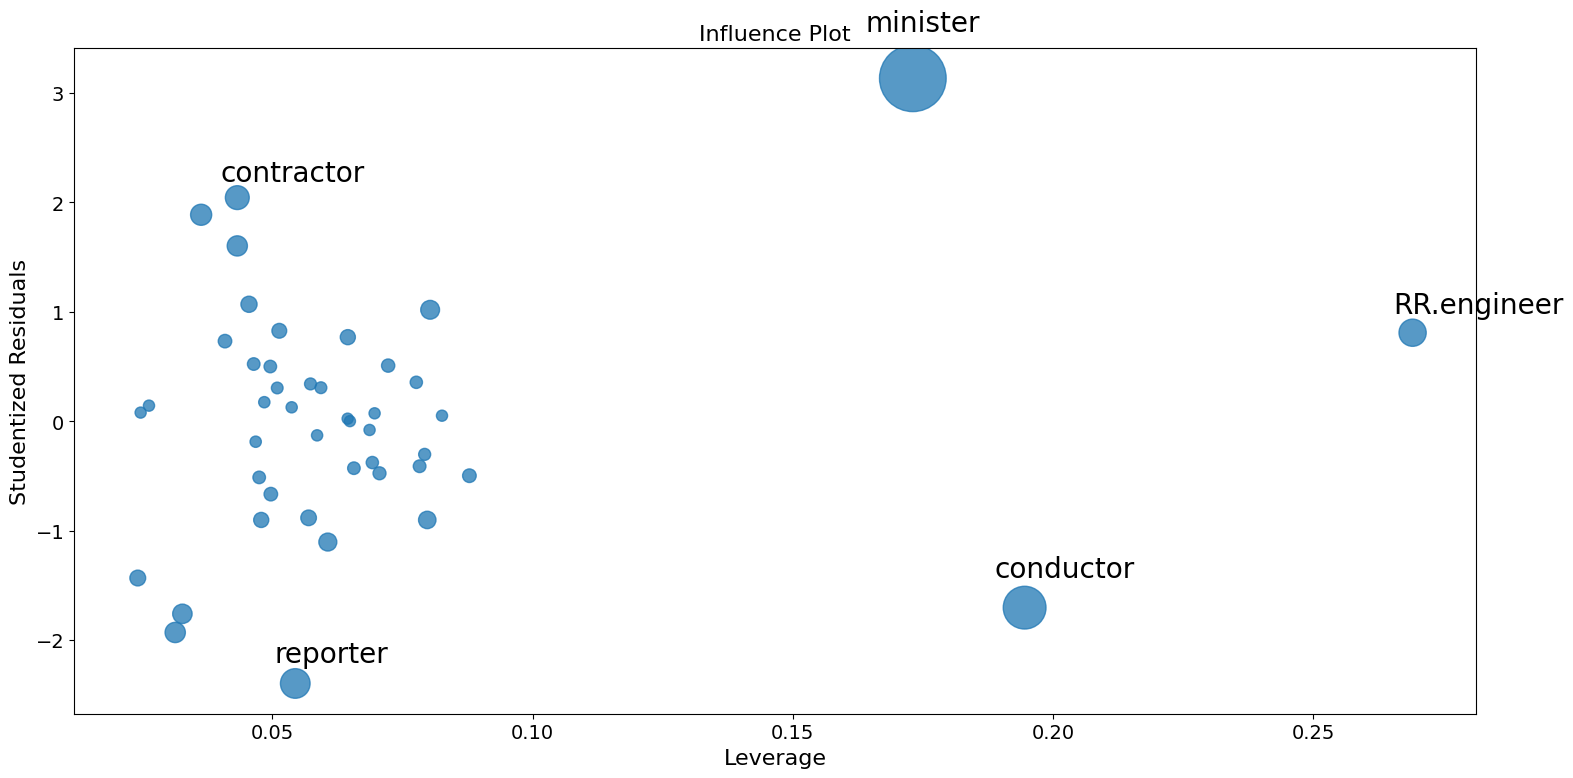

In [34]:
fig = sm.graphics.influence_plot(prestige_model, criterion='cooks')
fig.tight_layout(pad=1.0)

As you can see there are a few worrisome observations. Both contractor and reporter have low leverage but a large residual. RR.engineer has small residual and large leverage. Conductor and minister have both high leverage and large residuals, and, therefore, large influence.

## Partial Regression Plots (Duncan)

Since we're doing multivariate regressions, we can't just look at individual bivariate plots to discern relationships. Instead, we want to look at the relationship of the dependent variable and the independent variables conditional on the other independent variables. We can do this through using partial regression plots, otherwise known as added variable plots.

In a partial regression plot, to discern the relationship between the response variable and th k-th variable, we compute the residuals by regressing the response variable versus the independent variables excluding <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mi>k</mi>
  </msub>
</math>. We can denote this by <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x223C;</mo>
      <mi>k</mi>
    </mrow>
  </msub>
</math>. We then compute the residuals by regressing <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mi>k</mi>
  </msub>
</math> on <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x223C;</mo>
      <mi>k</mi>
    </mrow>
  </msub>
</math>. The partial regression plot is the plot of the former versus the latter residuals.

The notable points of this plot are that the fitted line has slope <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x3B2;</mi>
    <mi>k</mi>
  </msub>
</math> and intercept zero. The residuals of this plot are the same as those of the least squares fit of the original model with full *X*. You can discern the effects of the individual data values on the estimations of a coefficient easily. If `obs_labels` is `Trye`, then these points are annotated with their observation label. You can also see the violation of underlying assumptions such as homoskedasticity and linearity.

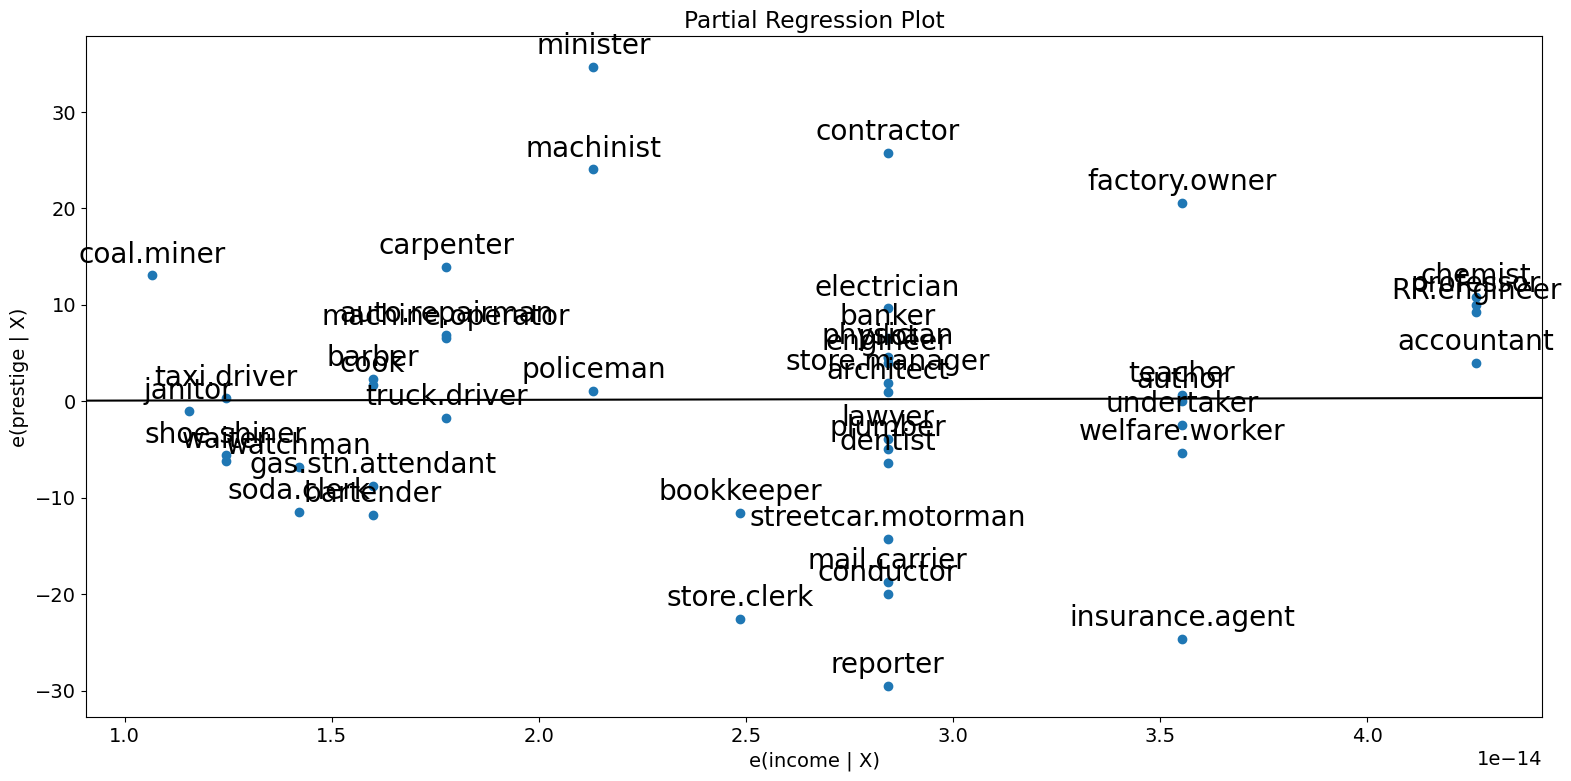

In [35]:
fig = sm.graphics.plot_partregress(
    'prestige', 'income', ['income', 'education'], data=prestige
)
fig.tight_layout(pad=1.0)

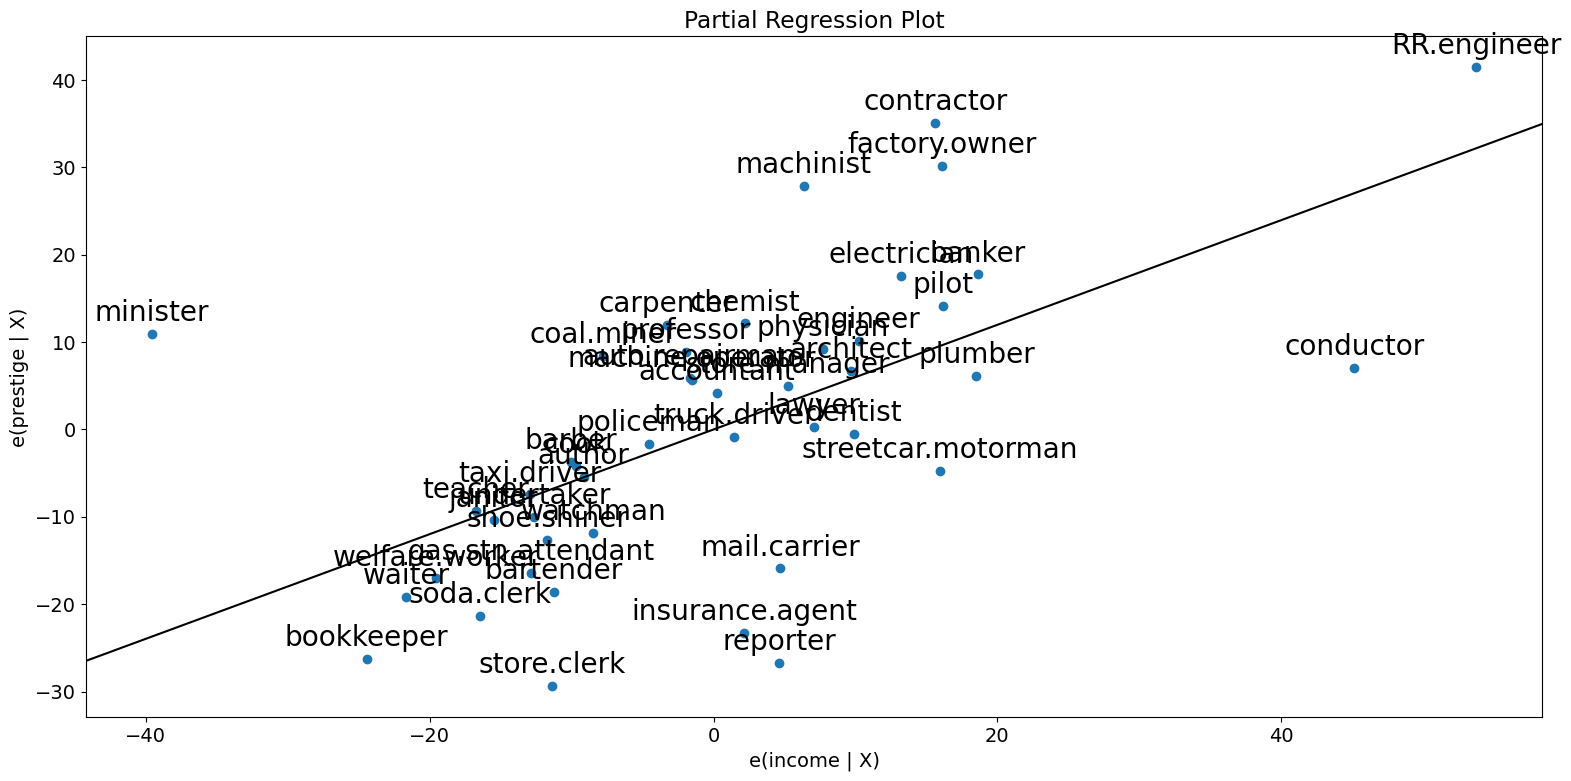

In [36]:
fig = sm.graphics.plot_partregress('prestige', 'income', ['education'], data=prestige)
fig.tight_layout(pad=1.0)

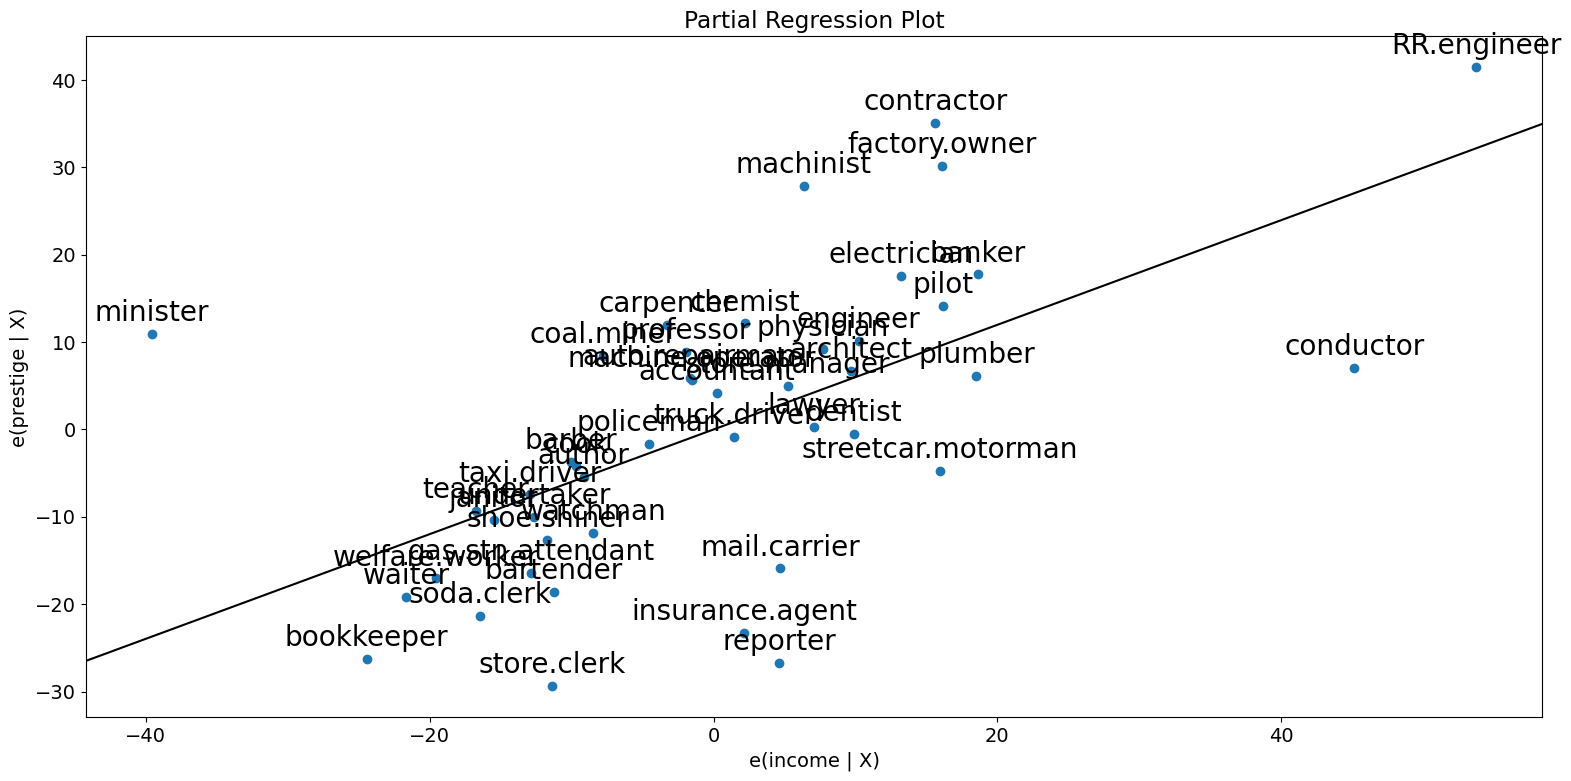

In [37]:
fig = sm.graphics.plot_partregress('prestige', 'income', ['education'], data=prestige)
fig.tight_layout(pad=1.0)

As you can see the partial regression plot confirms the influence of conductor, minister, and RR.engineer on the partial relationship between income and prestige. The cases greatly decrease the effect of income on prestige. Dropping these cases confirms this.

**Note:** You've been using `1` instead of `l` for the variable names. We're fixing that starting here.

In [38]:
subset = ~prestige.index.isin(['conductor', 'RR.engineer', 'minister'])
prestige_model2 = ols(
    'prestige ~ income + education', data=prestige, subset=subset
).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           2.02e-18
Time:                        08:46:17   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.0

For a quick check of all the regressors, you can use `plot_partregress_grid`. These plots will not label the points, but you can use them to identify problems and then use `plot_partregress` to get more information.

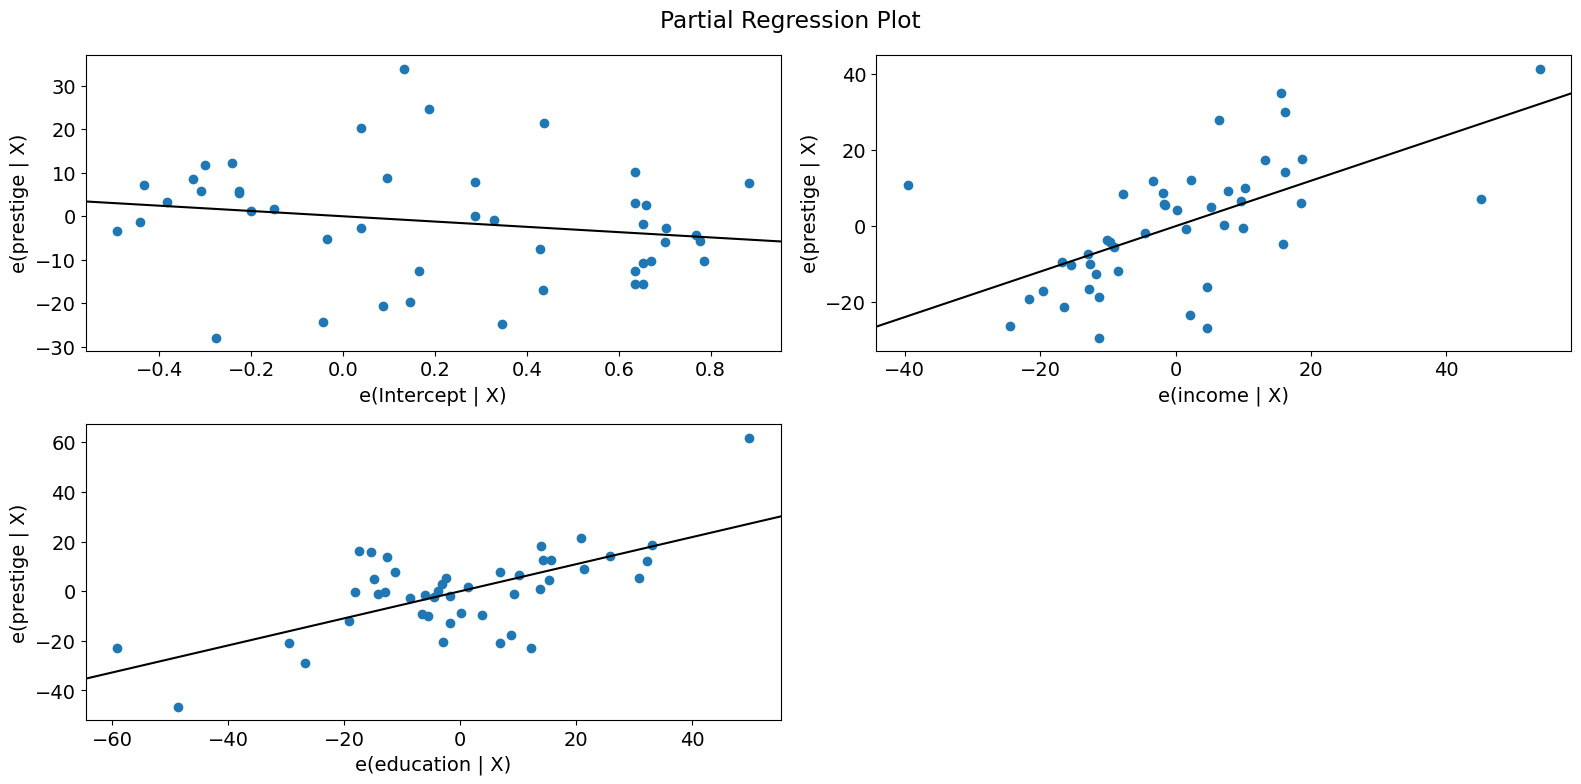

In [39]:
fig = sm.graphics.plot_partregress_grid(prestige_model)
fig.tight_layout(pad=1.0)

## Component-Component plus Residual (CCPR) Plots

The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. The partial residuals plot is designed as <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext>Residuals</mtext>
  <mo>+</mo>
  <msub>
    <mi>B</mi>
    <mi>i</mi>
  </msub>
  <msub>
    <mi>X</mi>
    <mi>i</mi>
  </msub>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
</math> versus <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mi>i</mi>
  </msub>
</math>. The component adds <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>B</mi>
    <mi>i</mi>
  </msub>
  <msub>
    <mi>X</mi>
    <mi>i</mi>
  </msub>
</math> versus <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mi>i</mi>
  </msub>
</math> to show where the fitted line would lie. **Care should be taken if Ci is highly correlated with any of the other independent variables**. If this is the case, the variance evident in the plot will be an underestimate of the true variance.

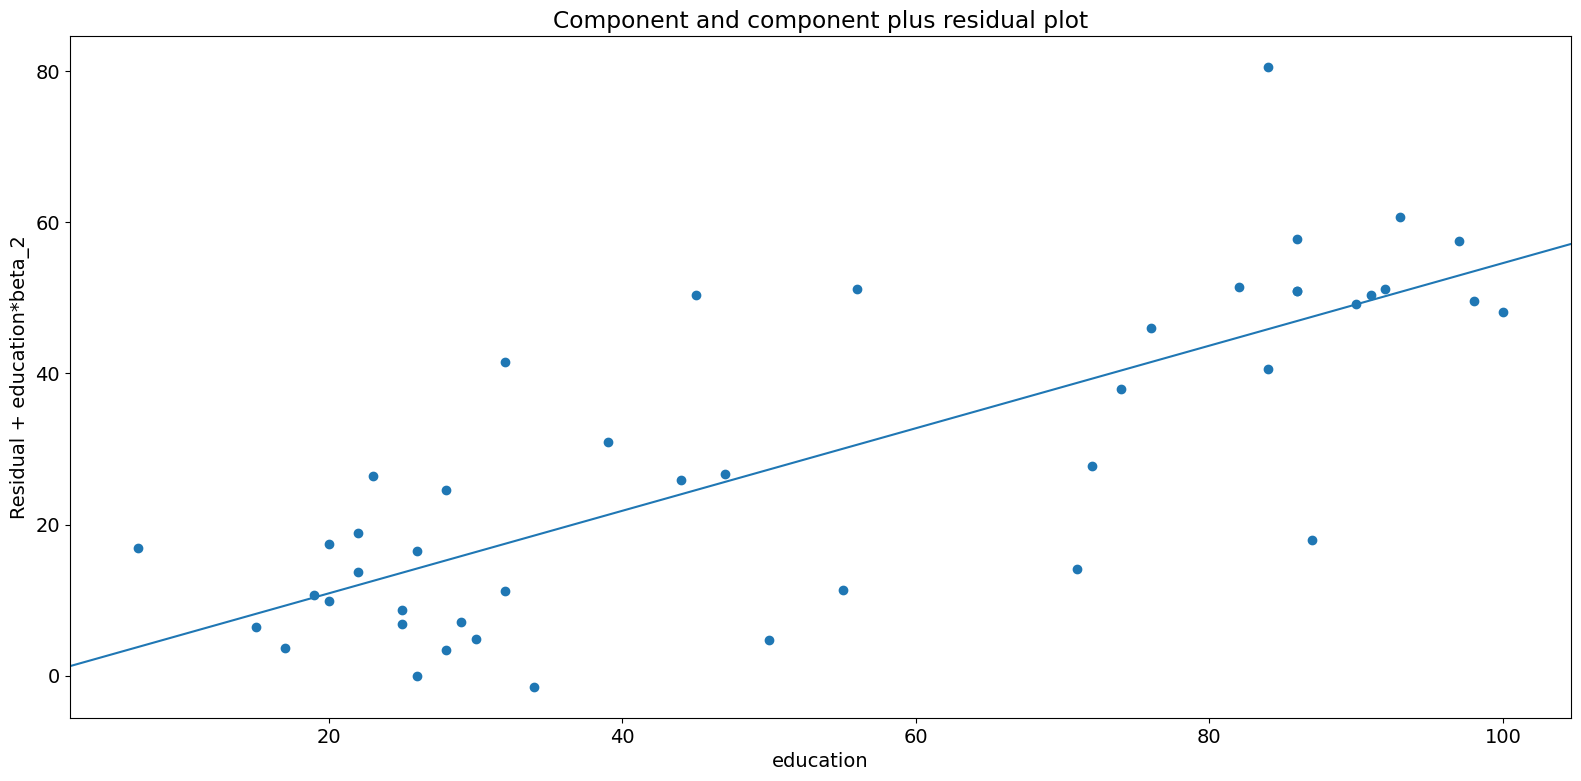

In [40]:
fig = sm.graphics.plot_ccpr(prestige_model, 'education')
fig.tight_layout(pad=1.0)

As you can see the relationship between the variation in prestige explained by education conditional on income seems to be linear, though you can see there are some observations that are exerting considerable influence on the relationship. We can look at more than one variable by using `plot_ccpr_grid`.

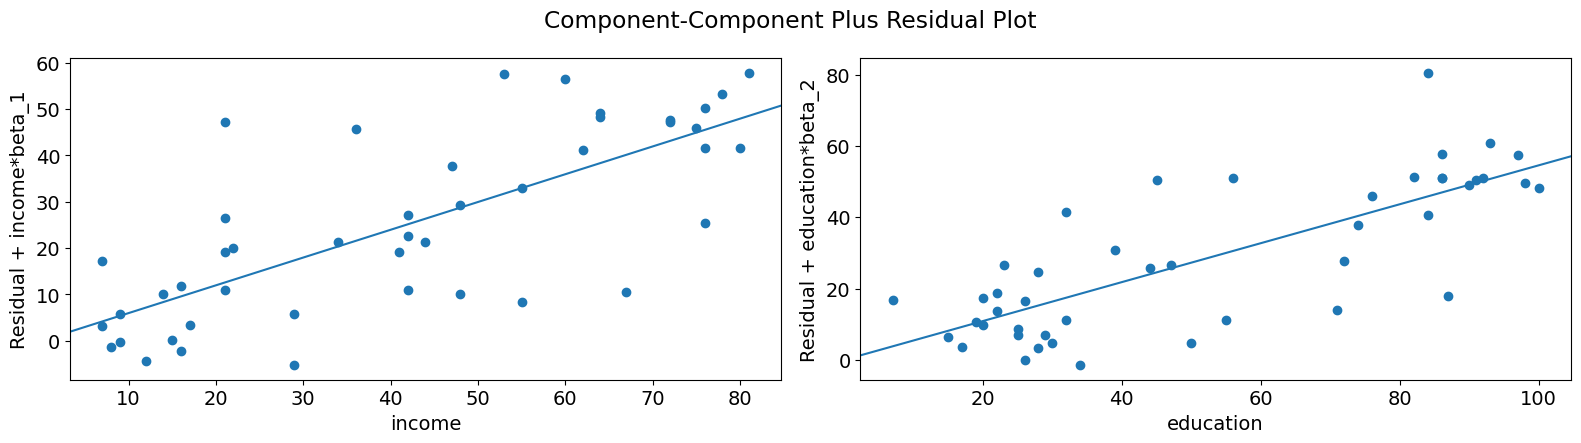

In [41]:
fig = sm.graphics.plot_ccpr_grid(prestige_model)
fig.tight_layout(pad=1.0)

## Single Variable Regression Diagnostics

The `plot_regress_exog` function is a convenience function that gives a 2x2 plot containing the dependent variable and fitted values with confidence intervals vs. the independent variable chosen, the residuals of the model vs. the chosen independent variable, a partial regression plot, and a CCPR plot. This function can be used for quickly checking model assumptions with respect to a single regressor.

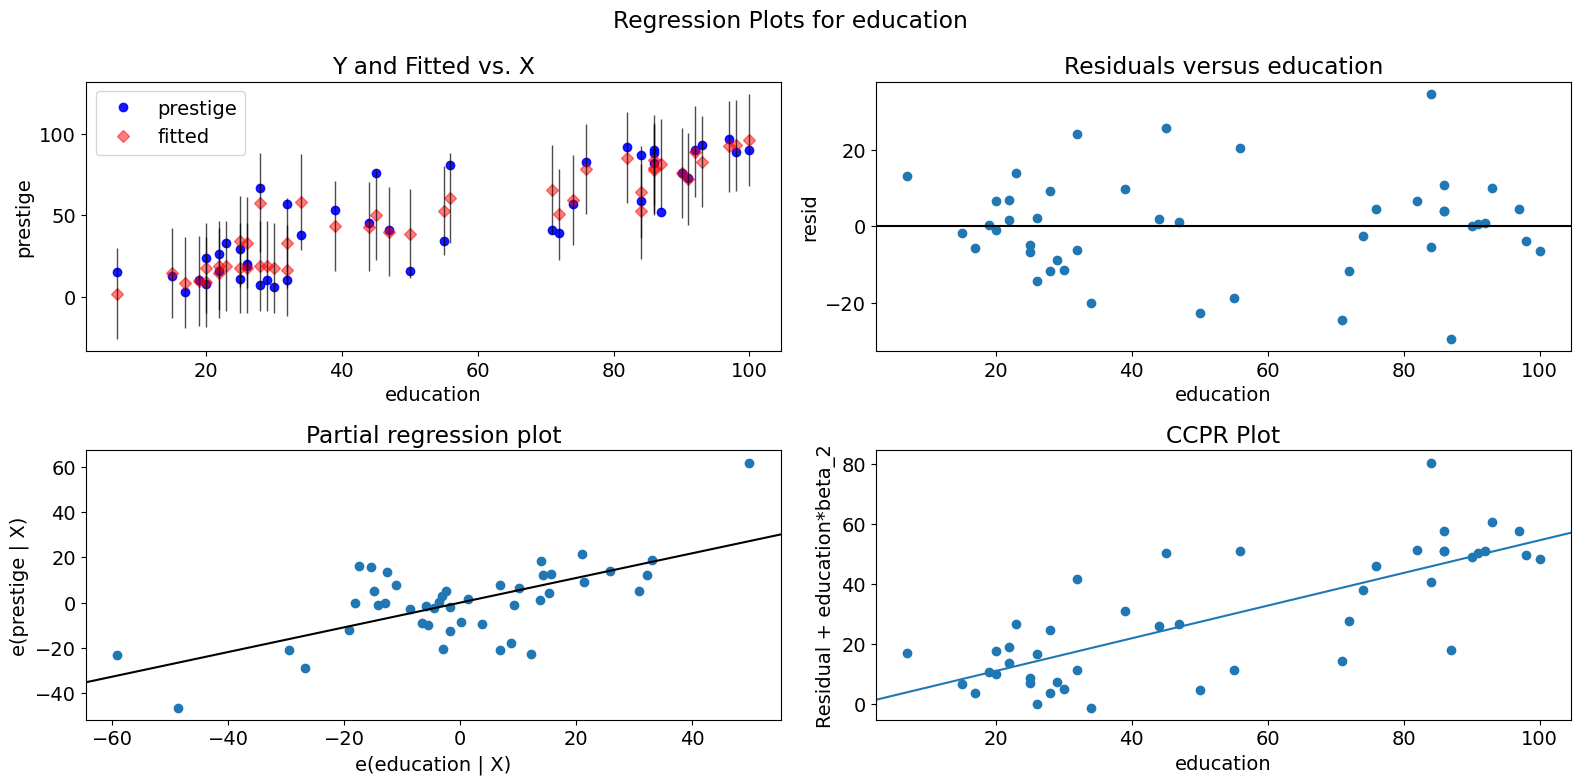

In [42]:
fig = sm.graphics.plot_regress_exog(prestige_model, 'education')
fig.tight_layout(pad=1.0)

## Fit Plot

The `plot_fit` function plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.

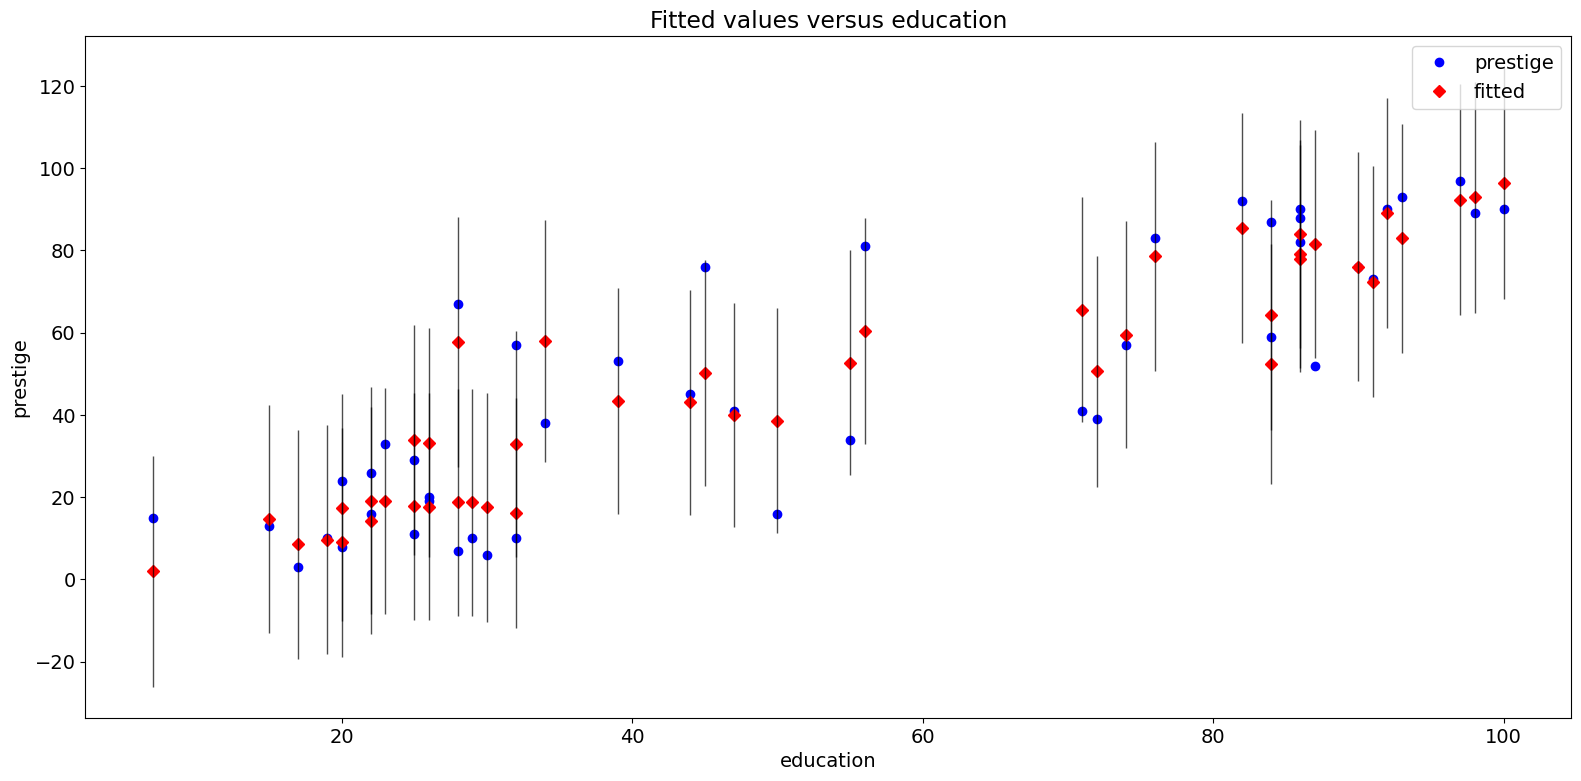

In [43]:
fig = sm.graphics.plot_fit(prestige_model, 'education')
fig.tight_layout(pad=1.0)

## Leverage-Resid2 Plot

Closely related to the influence plot is the leverage-resid2 plot.

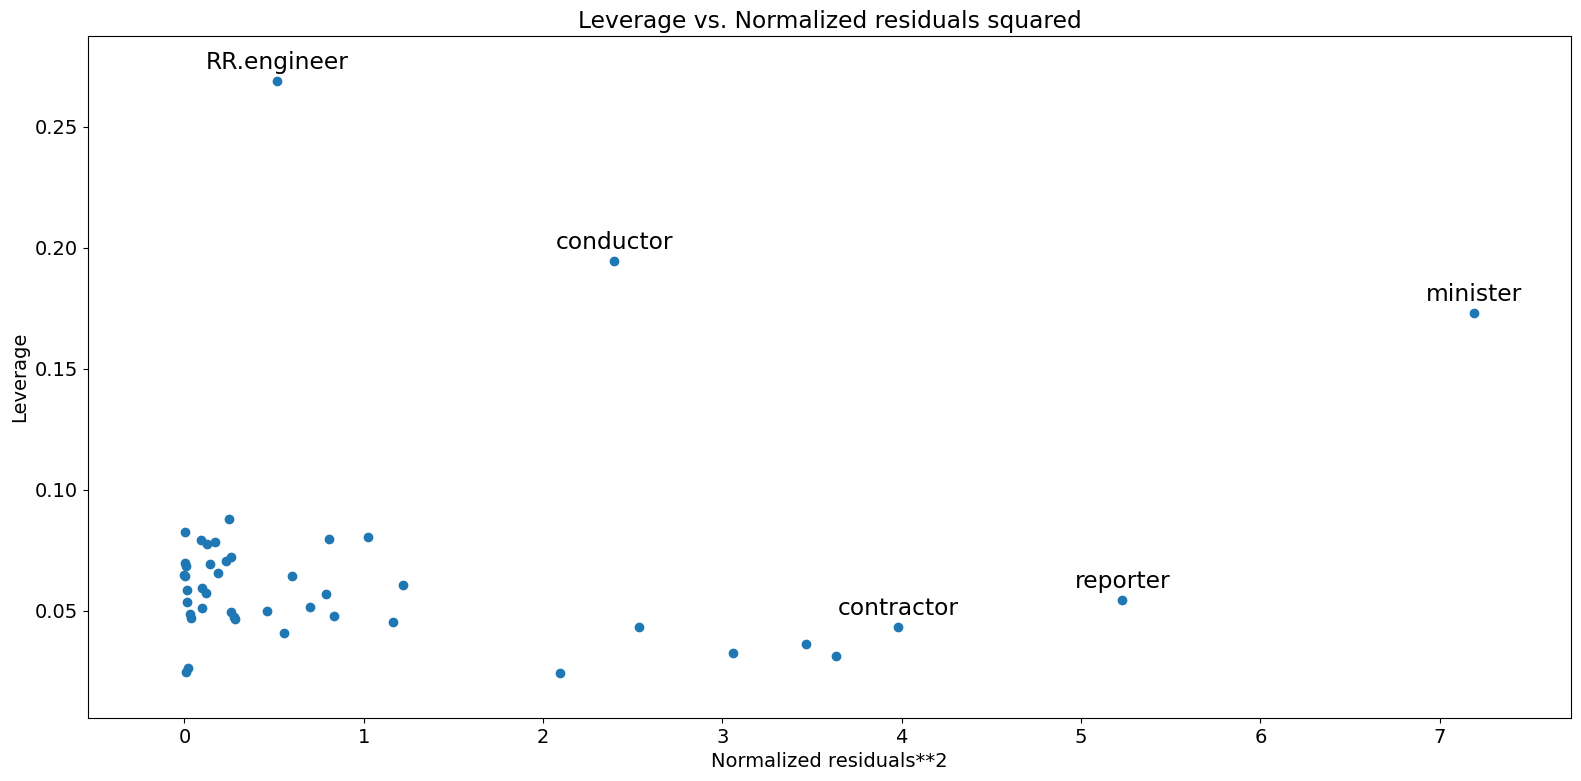

In [45]:
fig = sm.graphics.plot_leverage_resid2(prestige_model)
fig.tight_layout(pad=1.0)

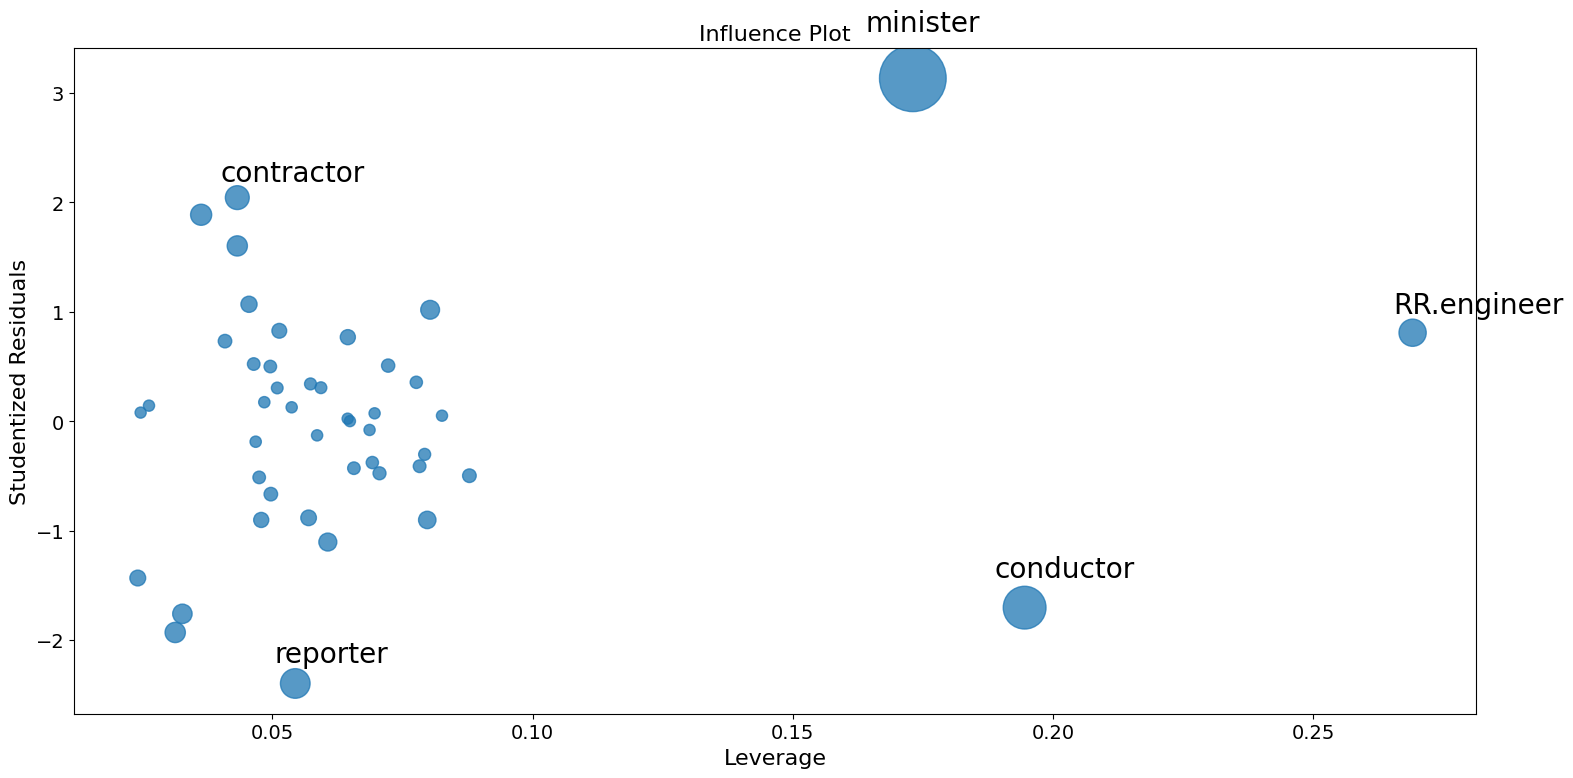

In [46]:
fig = sm.graphics.influence_plot(prestige_model)
fig.tight_layout(pad=1.0)

# Robust Regression Example (to correct for outliers)

Check the bottom of [this page](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html#Using-robust-regression-to-correct-for-outliers.) for an example.